## Tic-Tac-Toe Agent

#### Importing libraries

In [1]:
import collections
import numpy as np
import random
import pickle
import collections
from matplotlib import pyplot as plt
import time

In [2]:
class Qlearning:
    # Hyper Parameters are set here
    def __init__(self, epsilon=0.2, alpha=0.3, gamma=0.9, values=[]):
        self.epsilon=epsilon
        self.alpha=alpha
        self.gamma=gamma
        self.Q_dict = {} #Q table
        self.last_board=None
        self.q_last=0.0
        self.state_action_last=None
        self.values = values
        self.options = []
        self.States_track={}

    # Reset 
    def game_begin(self):
        self.last_board = None
        self.q_last = 0.0
        self.state_action_last = None
        self.options = self.values.copy()

    # esplion greedy stratergy
    def epslion_greedy(self, state, possible_moves): #esplion greedy algorithm
        #return  action
        self.last_board = tuple(state)
        if(random.random() < self.epsilon):
            move = random.choice(possible_moves) ##action
            self.state_action_last=(self.last_board,move)
            self.q_last=self.getQ(self.last_board,move)
            return move
        else: #greedy strategy
            Q_list=[]
            for action in possible_moves:
                Q_list.append(self.getQ(self.last_board,action))
            maxQ=max(Q_list)

            if Q_list.count(maxQ) > 1:
                # more than 1 best option; choose among them randomly
                best_options = [i for i in range(len(possible_moves)) if Q_list[i] == maxQ]
                i = random.choice(best_options)
            else:
                i = Q_list.index(maxQ)
            self.state_action_last = (self.last_board, possible_moves[i])
            self.q_last = self.getQ(self.last_board, possible_moves[i])
            return possible_moves[i]

    
    def getQ(self, state, action): #get Q states
        if(self.Q_dict.get((state,action))) is None:
            self.Q_dict[(state,action)] = 1.0
        return self.Q_dict.get((state,action))

    def updateQ(self, reward, state, possible_moves): # update Q states using Qlearning
        q_list=[]
        for moves in possible_moves:
            q_list.append(self.getQ(tuple(state), moves))
        if q_list:
            max_q_next = max(q_list)
        else:
            max_q_next = 0.0
        self.Q_dict[self.state_action_last] = self.q_last + self.alpha * ((reward + self.gamma*max_q_next) - self.q_last)

    def saveQ(self,file_name):  #save table
        with open(file_name +'.pkl', 'wb') as handle:
            pickle.dump(self.Q_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
            print(len(self.Q_dict.keys())) 
    
    def save_tracking_states(self):
        for state in self.States_track.keys():
            for action in self.States_track[state].keys():
                if state in self.Q_dict and action in self.Q_dict[state]:
                    self.States_track[state][action].append(Q_dict[state][action])
        return self.States_track


In [3]:
from TCGame_Env import TicTacToe

game = TicTacToe() #game instance
playerodd =  Qlearning(values=[1,3,5,7,9]) #player1 learning agent
playereven =  Qlearning(values=[2,4,6,8]) #player2 learning agent
game.beginTraining(playerodd,playereven, 200000, verbose=False) 
game.saveStates()  #save Qtables

Training Started
training has been Completed
1644071
896142


In [4]:
odd_player_Q, even_player_Q = game.getQ()

In [5]:
odd_player_Q

{((0, 0, 0, 0, 0, 0, 0, 0, 0), 1): -2.8007722879946257,
 ((0, 0, 0, 0, 0, 0, 0, 0, 0), 2): -2.8090635740486682,
 ((0, 0, 0, 0, 0, 0, 0, 0, 0), 3): -2.8729352858156725,
 ((0, 0, 0, 0, 0, 0, 0, 0, 0), 4): -1.6809071471934978,
 ((0, 0, 0, 0, 0, 0, 0, 0, 0), 5): -4.303166197367698,
 ((0, 0, 0, 0, 0, 0, 0, 0, 0), 6): -2.9089549078455583,
 ((0, 0, 0, 0, 0, 0, 0, 0, 0), 7): -0.25694862369562543,
 ((0, 0, 0, 0, 0, 0, 0, 0, 0), 8): -2.5538162886343523,
 ((0, 0, 0, 0, 0, 0, 0, 0, 0), 9): -2.907794172667266,
 ((0, 5, 0, 0, 0, 0, 0, 0, 0), 1): 1.0,
 ((0, 5, 0, 0, 0, 0, 0, 0, 0), 3): 1.0,
 ((0, 5, 0, 0, 0, 0, 0, 0, 0), 4): 1.0,
 ((0, 5, 0, 0, 0, 0, 0, 0, 0), 5): 1.0,
 ((0, 5, 0, 0, 0, 0, 0, 0, 0), 6): 1.0,
 ((0, 5, 0, 0, 0, 0, 0, 0, 0), 7): 1.0,
 ((0, 5, 0, 0, 0, 0, 0, 0, 0), 8): 1.0,
 ((0, 5, 0, 0, 0, 0, 0, 0, 0), 9): 1.0,
 ((0, 5, 0, 0, 0, 0, 0, 0, 8), 1): -0.621307604307426,
 ((0, 5, 0, 0, 0, 0, 0, 0, 8), 3): -0.4595308195099994,
 ((0, 5, 0, 0, 0, 0, 0, 0, 8), 4): -1.805123,
 ((0, 5, 0, 0, 0, 0,

In [6]:
even_player_Q

{((0, 5, 0, 0, 0, 0, 0, 0, 0), 1): -9.09999081360883,
 ((0, 5, 0, 0, 0, 0, 0, 0, 0), 3): -9.09999081360883,
 ((0, 5, 0, 0, 0, 0, 0, 0, 0), 4): -9.09999081360883,
 ((0, 5, 0, 0, 0, 0, 0, 0, 0), 5): -9.09999081360883,
 ((0, 5, 0, 0, 0, 0, 0, 0, 0), 6): -9.09999081360883,
 ((0, 5, 0, 0, 0, 0, 0, 0, 0), 7): -9.09999081360883,
 ((0, 5, 0, 0, 0, 0, 0, 0, 0), 8): -9.099986876584044,
 ((0, 5, 0, 0, 0, 0, 0, 0, 0), 9): -9.099995498668326,
 ((0, 5, 0, 0, 0, 0, 0, 3, 8), 1): -2.03,
 ((0, 5, 0, 0, 0, 0, 0, 3, 8), 3): -2.03,
 ((0, 5, 0, 0, 0, 0, 0, 3, 8), 4): -2.03,
 ((0, 5, 0, 0, 0, 0, 0, 3, 8), 5): 1.0,
 ((0, 5, 0, 0, 0, 0, 0, 3, 8), 6): 1.0,
 ((0, 5, 0, 0, 0, 0, 0, 3, 8), 7): 0.04900000000000038,
 ((7, 5, 4, 0, 0, 0, 0, 3, 8), 4): 1.0,
 ((7, 5, 4, 0, 0, 0, 0, 3, 8), 5): 1.0,
 ((7, 5, 4, 0, 0, 0, 0, 3, 8), 6): 1.0,
 ((7, 5, 4, 0, 0, 0, 0, 3, 8), 7): 1.0,
 ((5, 0, 0, 0, 0, 0, 0, 0, 0), 2): -9.09999356952618,
 ((5, 0, 0, 0, 0, 0, 0, 0, 0), 3): -9.09999356952618,
 ((5, 0, 0, 0, 0, 0, 0, 0, 0), 4): -

In [7]:
odd_player_Q[((0, 0, 0, 0, 0, 0, 0, 0, 0), 1)]

-2.8007722879946257

In [8]:
odd_player_Q[((0, 0, 0, 0, 0, 0, 0, 0, 0), 2)]

-2.8090635740486682

In [9]:
odd_player_Q[((0, 0, 0, 0, 0, 0, 0, 0, 0), 3)]

-2.8729352858156725

In [10]:
odd_player_Q[((0, 0, 0, 0, 0, 0, 0, 0, 0), 4)]

-1.6809071471934978

In [11]:
odd_player_Q[((0, 0, 0, 0, 0, 0, 0, 0, 0), 5)]

-4.303166197367698

In [12]:
odd_player_Q[((0, 0, 0, 0, 0, 0, 0, 0, 0), 6)]

-2.9089549078455583

In [13]:
odd_player_Q[((0, 0, 0, 0, 0, 0, 0, 0, 0), 7)]

-0.25694862369562543

In [14]:
odd_player_Q[((0, 0, 0, 0, 0, 0, 0, 0, 0), 8)]

-2.5538162886343523

In [15]:
odd_player_Q[((0, 0, 0, 0, 0, 0, 0, 0, 0), 9)]

-2.907794172667266

### Epsilon - decay check

In [16]:
max_epsilon = 1.0
min_epsilon = 0.001
time = np.arange(0,5000000)
epsilon = []
for i in range(0,5000000):
    epsilon.append(min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.000001*i))

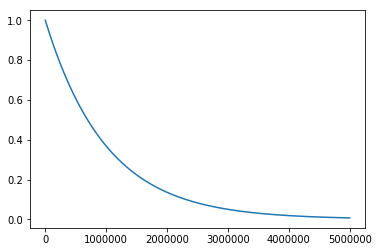

In [17]:
plt.plot(time, epsilon)
plt.show()